In [31]:
#RETO 4, ALGORITMO LM( PREDICCION DE VICTIMAS DE ACCIDENTES AEREOS);

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load the dataset
dataset = pd.read_csv('aviation-accident.csv')

# 1. deal with "fatalities" null values
# Convertir a numérico, y reemplazar valores faltantes con la mediana
dataset['fatalities'] = pd.to_numeric(dataset['fatalities'], errors='coerce')
dataset['fatalities'].fillna(dataset['fatalities'].median(), inplace=True)

# 2. select columns for our model
columns_to_keep = ['type', 'operator', 'country', 'cat', 'year', 'fatalities']
dataset = dataset[columns_to_keep]

# 3. deal with unknown values
dataset.replace('unknown', None, inplace=True)
dataset.dropna(inplace=True)

# 4. Reduce categories with few to no value, replace them with "other"
categorical_columns = ['type', 'operator', 'country', 'cat', 'year']
for col in categorical_columns:
    value_counts = dataset[col].value_counts()
    rare_threshold = 50  # rare category threshold
    rare_categories = value_counts[value_counts < rare_threshold].index
    dataset[col] = dataset[col].apply(lambda x: 'Other' if x in rare_categories else x)

# 5. turn categoric variables to numeric for the model to learn
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

print(dataset)

       fatalities  type_Antonov An-12  type_Antonov An-12B  \
61           14.0                   0                    0   
62            1.0                   0                    0   
63            0.0                   0                    0   
64            0.0                   0                    0   
65            0.0                   0                    0   
...           ...                 ...                  ...   
23912         0.0                   0                    0   
23913         0.0                   0                    0   
23914         5.0                   0                    0   
23915         2.0                   0                    0   
23916         0.0                   0                    0   

       type_Antonov An-12BP  type_Antonov An-2  type_Antonov An-24B  \
61                        0                  0                    0   
62                        0                  0                    0   
63                        0               

MSE: 241.34120717911264
CDet (R^2): 0.05651419901921584
Medium absolute error (MAE): 6.971681113474955


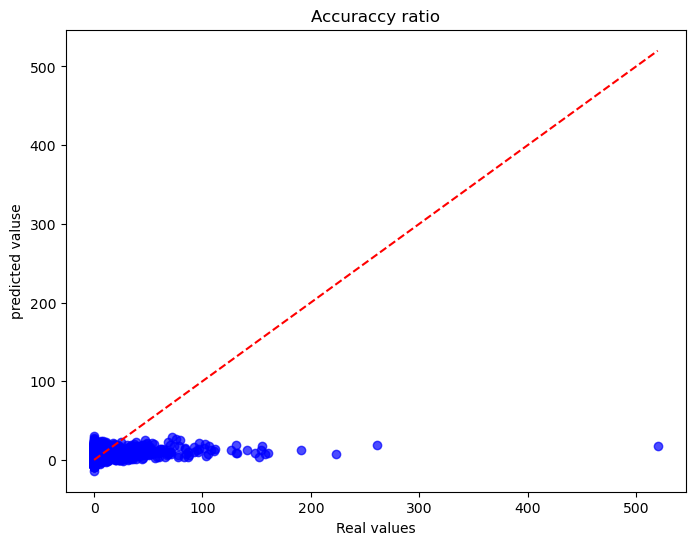

In [35]:
# 6. Divide the dataset
X = dataset.drop('fatalities', axis=1)
y = dataset['fatalities']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# -----------------------------------------------------------
# normalize the data (suggested by AI) 25/01/25
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# -------------------------------------------------------
# train the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("CDet (R^2):", r2)
print("Medium absolute error (MAE):", mae)

# real vs/predicted values graphic chart
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Real values')
plt.ylabel('predicted valuse')
plt.title('Accuraccy ratio')
plt.show()

In [34]:
#19/01/25 = X MODEL NOT ACCURATE
#20/01/25 = X MNA
#21/01/25 = x MNA
#23/01/25 = X MNA
#24/01/25 = X MNA
#25/01/25 = X MNA